**Introduction**

The goal is perform basic data analysis of the Kaggle dataset "Shark Attacks" : https://www.kaggle.com/datasets/felipeesc/shark-attack-dataset

Workflow:
* Importing Python libraries
* Loading the data from csv file
* Checking the data
* Removing of selected empty cells
* Filling missing values, selecting and renaming the columns
* Preparing data for visualisation (somewhere with regular expressions)
* Visualisation 



**Importing Python libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from IPython.display import display

**Loading the data**

In [2]:
attack_df = pd.read_csv("dataset/attacks.csv", encoding="ISO-8859-1")
attack_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [3]:
# Use "display" to show the DataFrame as a formatted table
attack_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


**Checking and cleaning the data**

In [4]:
# How many cells are filled?
attack_df.notna().sum()

Case Number               8702
Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal (Y/N)               5763
Time                      2948
Species                   3464
Investigator or Source    6285
pdf                       6302
href formula              6301
href                      6302
Case Number.1             6302
Case Number.2             6302
original order            6309
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [5]:
# How many cells are without any data?
attack_df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
# Cleaning (removing) all cells with NaN value in the field of "Date", "Year" and "Case Number"
attack_df = attack_df.dropna(subset=["Date", "Year", "Case Number"])
attack_df.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         4
Country                     50
Area                       455
Location                   539
Activity                   544
Name                       210
Sex                        565
Age                       2829
Injury                      28
Fatal (Y/N)                538
Time                      3351
Species                   2836
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6298
Unnamed: 23               6297
dtype: int64

In [7]:
# Overview of all columns 
attack_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
# Selecting columns for this visualisation: from the column "Case Number" to the column "Species"
# Columns from "Investigator of Source" and next columns will be omitted.

attack_df = attack_df.loc[:, "Case Number": "Species "]
attack_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [9]:
# Changing of format of column "Year" from xxxx.0 to xxxx by removing .0
attack_df["Year"] = attack_df["Year"].astype(int)
attack_df["Year"].unique()


array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988,
       1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

**Visualisation: Numbers of Shark Attacks Between Years 1917 - 2017**

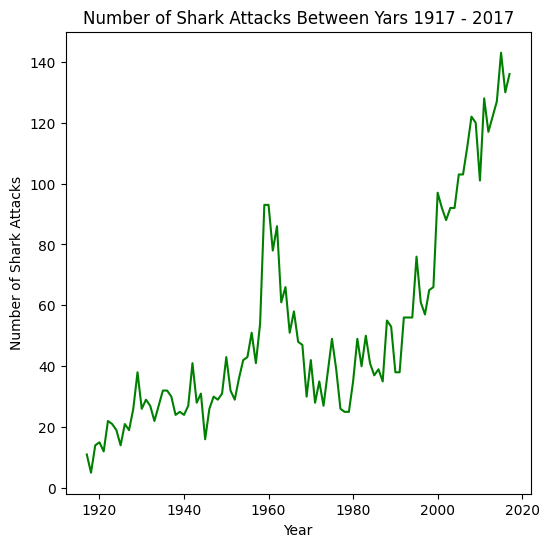

In [10]:
# Filtration of the years
filtered_year_attack_df = attack_df[(attack_df["Year"] >= 1917) & (attack_df["Year"] <= 2017)]

# Counting of attacks per year
byYear_attack = filtered_year_attack_df.groupby('Year')['Date'].count().reset_index()

# Visualisation by MatPlotLib
plt.figure(figsize=(6, 6))
plt.plot(byYear_attack["Year"], byYear_attack["Date"], color="green")
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")
plt.title("Number of Shark Attacks Between Yars 1917 - 2017")

plt.show()

**Visualisation: Activities Preceding Shark Attack (Between Years 1917 - 2017)**

In [11]:
filtered_year_attack_df["Activity"].value_counts().head(20)

Activity
Surfing            953
Swimming           677
Fishing            349
Spearfishing       330
Wading             137
Diving              97
Standing            89
Snorkeling          87
Scuba diving        74
Body boarding       60
Body surfing        49
Swimming            44
Bathing             40
Kayaking            33
Treading water      32
Boogie boarding     28
Free diving         25
Pearl diving        22
Windsurfing         18
Boogie Boarding     16
Name: count, dtype: int64

In [12]:
# Modifying group names (merging) using regular expressions
filtered_year_attack_df.loc["Activity"] = filtered_year_attack_df['Activity'].replace(r'(?i).*swimming.*', "Swimming", regex=True)
filtered_year_attack_df.loc["Activity"] = filtered_year_attack_df['Activity'].replace(r'(?i).*surfing.*', "Surfing", regex=True)
filtered_year_attack_df.loc["Activity"] = filtered_year_attack_df['Activity'].replace(r'(?i).*diving.*', "Diving", regex=True)
filtered_year_attack_df.loc["Activity"] = filtered_year_attack_df['Activity'].replace(r'(?i).*boogie.*', "Boogie boarding", regex=True)
filtered_year_attack_df.loc["Activity"] = filtered_year_attack_df['Activity'].replace(r'(?i).*skiing.*', "Surf skiing", regex=True)

C:\Users\Dagmar Vršková\AppData\Local\Temp\ipykernel_10900\1943595751.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
filtered_year_attack_df["Activity"].value_counts().head(20)

Activity
Surfing            953
Swimming           677
Fishing            349
Spearfishing       330
Wading             137
Diving              97
Standing            89
Snorkeling          87
Scuba diving        74
Body boarding       60
Body surfing        49
Swimming            44
Bathing             40
Kayaking            33
Treading water      32
Boogie boarding     28
Free diving         25
Pearl diving        22
Windsurfing         18
Boogie Boarding     16
Name: count, dtype: int64

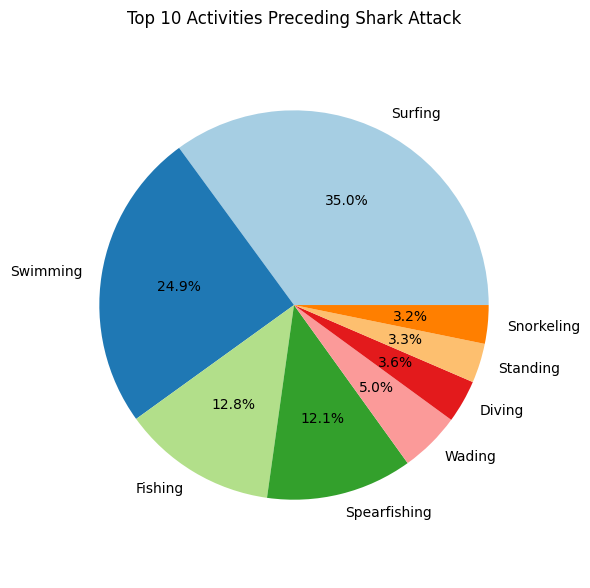

In [14]:
# Visualisation by MatPlotLib
top_activities = filtered_year_attack_df["Activity"].value_counts().head(8)

plt.figure(figsize=(6, 6))
plt.pie(top_activities.values, labels=top_activities.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Top 10 Activities Preceding Shark Attack")
plt.axis("equal") 
plt.tight_layout()

plt.show()

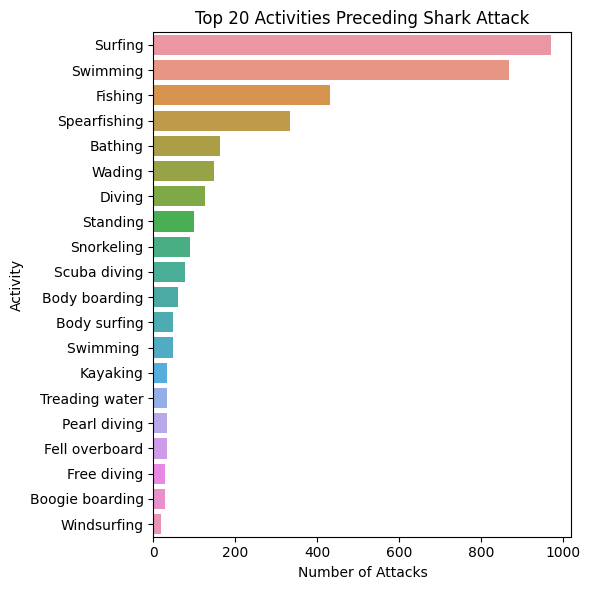

In [15]:
# Visualisation by Seaborn
top_activities = attack_df["Activity"].value_counts().head(20)

plt.figure(figsize=(6, 6))
sns.set_palette("pastel")  
sns.barplot(x=top_activities.values, y=top_activities.index)
plt.xlabel("Number of Attacks")
plt.ylabel("Activity")
plt.title("Top 20 Activities Preceding Shark Attack")
plt.tight_layout()

plt.show()

**Visualisation: Gender Of Shark Attack Victims (Between Years 1917 - 2017)**

In [16]:
# Renaming column "Sex " to "Gender"
filtered_year_attack_df = filtered_year_attack_df.rename(columns= {"Sex ": "Gender"})
filtered_year_attack_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Gender', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species '],
      dtype='object')

In [17]:
# Checking the unique values and their counts in the column "Gender"
filtered_year_attack_df["Gender"].value_counts()

Gender
M      4168
F       577
M         2
lli       1
N         1
Name: count, dtype: int64

In [18]:
# Data editing in the column "Gender"
# Replacing NaN values by the term "Unknown"
filtered_year_attack_df["Gender"] = filtered_year_attack_df["Gender"].fillna("Unknown")
filtered_year_attack_df["Gender"].value_counts()

Gender
M          4168
F           577
Unknown     490
M             2
lli           1
N             1
Name: count, dtype: int64

In [19]:
# Merging values "M" and "M " into category "Male" and renaming category "F" to "Female"
filtered_year_attack_df["Gender"] = filtered_year_attack_df["Gender"].replace({"M": "Male", "M ": "Male", "F": "Female"})

# Merging other values into category "Unknown"
mask = ~(filtered_year_attack_df["Gender"].isin(["Male", "Female"]))
filtered_year_attack_df.loc[mask, "Gender"] = "Unknown"
filtered_year_attack_df["Gender"]
filtered_year_attack_df.columns
filtered_year_attack_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species
53,2017.12.31,31-Dec-2017,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,Female,54,Severe lacerations to left thigh & knee,N,18h00,Tiger shark
54,2017.12.30,30-Dec-2017,2017.0,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,Female,35,Foot bitten,N,12h00,NaN
55,2017.12.21,21-Dec-2017,2017.0,Provoked,MALAYSIA,Sepang,Bagan Lalang Beach,Fishing / Wading,Sairol Harun,Male,24,"Minor injury to thigh, PROVOKED INCIDENT",N,NaN,Juvenile nurse shark
56,2017.12.09,09-Dec-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Snorkeling,Sarah Illig-Carroll,Female,25,Minor injury to arm,N,NaN,Nurse shark. 5'
57,2017.11.30.b,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba Diving,__ Jimenez,Male,26,Serious injury to leg,N,NaN,"Tiger shark, female"


In [20]:
# Checking new merged values
filtered_year_attack_df["Gender"].value_counts()

Gender
Male       4170
Female      577
Unknown     492
Name: count, dtype: int64

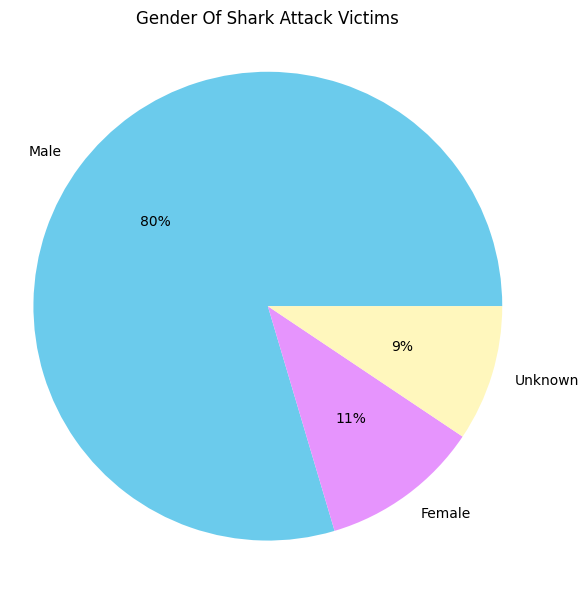

In [21]:
# Visualisation by MatPlotLib
by_gender = filtered_year_attack_df["Gender"].value_counts().head()

colors = ['#6bcbec', '#e694fd', "#fff7bd"]
plt.figure(figsize=(6, 6))
plt.pie(by_gender.values, labels=by_gender.index, autopct='%1.0f%%', colors=colors)
plt.title("Gender Of Shark Attack Victims")
plt.axis("equal")
plt.tight_layout()
#plt.legend(by_gender.index, title='Gender', loc='right', bbox_to_anchor=(1.3, 0.8))

plt.show()

